In [79]:
# mini project

In [80]:
# import libraries:
    # gen
import pandas as pd
import numpy as np
import statistics as st
    # plot
import matplotlib.pyplot as plt
import seaborn as sns
    # regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [81]:
# read CSV
main_df = pd.read_csv("CollectedData.csv")
main_df.describe()

,8,1,Unnamed: 2,0,1993,146,Unnamed: 6,2,1.1,Unnamed: 9,...,Unnamed: 70,15.3,7.8,11.55,58,100,79,15.4,8.1,11.7
count,12561.000000,12562.000000,9650.000000,12340.000000,11213.000000,12549.000000,9746.000000,12510.000000,12514.000000,3354.000000,...,3060.000000,12546.000000,11197.000000,11197.000000,12546.000000,12546.000000,12546.000000,12545.000000,12545.000000,12545.000000
mean,6.349647,218.228069,308.637202,17.738250,1990.376260,154.491234,869.834524,0.100584,1.857599,1.831544,...,1.683333,21.635212,13.406287,17.175087,56.622620,72.957013,61.098939,18.743268,12.320343,15.533866
std,5.453443,375.301009,680.115105,64.558478,4.863711,123.037790,609.240369,1.102012,0.414922,0.374326,...,1.273379,11.239960,10.228617,10.665415,18.121491,28.753290,24.704364,12.801067,10.883264,11.622522
min,1.000000,0.000000,0.000000,-1.000000,1982.000000,-3.000000,0.090278,-3.000000,1.000000,1.000000,...,1.000000,-22.600000,-27.200000,-24.900000,6.100000,-2.200000,0.000000,-22.700000,-27.300000,-25.000000
25%,2.000000,15.000000,26.000000,0.000000,1987.000000,23.000000,15.000000,-0.700000,2.000000,2.000000,...,1.000000,15.555556,7.260000,11.350000,45.100000,68.700000,53.769937,9.400000,4.100000,6.750000
50%,4.000000,59.000000,35.000000,1.000000,1992.000000,156.000000,1055.000000,0.000000,2.000000,2.000000,...,1.000000,25.000000,13.600000,18.200000,59.000000,83.000000,68.795799,21.200000,12.300000,16.350000
75%,10.000000,187.000000,45.000000,1.000000,1994.000000,242.000000,1410.750000,1.000000,2.000000,2.000000,...,2.000000,30.400000,22.200000,26.600000,67.000000,91.588515,76.950000,30.000000,22.200000,25.400000
max,61.000000,2031.000000,1996.000000,292.000000,1997.000000,365.000000,1930.000000,3.000000,3.000000,2.000000,...,6.000000,41.700000,28.900000,32.350000,100.000000,123.789573,100.350000,37.800000,33.200000,34.500000


In [82]:
# create sub-dataset with the required features
    # input features
x1 = main_df.iloc[:,2]
x2 = main_df.iloc[:,21]
x3 = main_df.iloc[:,18]
x4 = main_df.iloc[:,25]
x5 = main_df.iloc[:,26]
x6 = main_df.iloc[:,36]
x7 = main_df.iloc[:,37]
x8 = main_df.iloc[:,39]
x9 = main_df.iloc[:,41]
x10 = main_df.iloc[:,42]
x11 = main_df.iloc[:,43]
x12 = main_df.iloc[:,73]
x13 = main_df.iloc[:,76]
    # output features
y1 = main_df.iloc[:,7]
y2 = main_df.iloc[:,48]

In [83]:
# build dataframe from main_df
df = pd.DataFrame()
df['Age']  = x1
df['Clo'] = x2
df['Met'] = x3
df['Dewpt'] = x4
df['PlaneRadTemp'] = x5
df['Ta'] = x6
df['Tmrt'] = x7
df['Vel'] = x8
df['AirTurb'] = x9
df['Pa'] = x10
df['Rh'] = x11
df['TaOutdoor'] = x12
df['RhOutdoor'] = x13
df['AMV'] = y1
df['PMV'] = y2
df.head(15)

,Age,Clo,Met,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
0,NaN,0.78,2.1,NaN,NaN,19.1,19.629472,0.06,NaN,NaN,51.30,11.55,79.0,2.0,0.51
1,NaN,1.05,2.1,NaN,NaN,20.0,19.046655,0.06,NaN,NaN,51.90,11.55,79.0,1.0,0.80
2,NaN,0.40,2.6,NaN,NaN,21.0,20.153116,0.06,NaN,NaN,49.90,11.55,79.0,3.0,0.76
3,NaN,0.37,3.0,NaN,NaN,23.0,21.942458,0.06,NaN,NaN,45.60,11.55,79.0,3.0,1.47
4,NaN,1.29,2.1,NaN,NaN,19.8,19.429333,0.06,NaN,NaN,51.40,11.55,79.0,1.0,0.97
5,NaN,0.60,2.1,NaN,NaN,20.0,19.046655,0.06,NaN,NaN,51.90,11.55,79.0,2.0,0.32
6,NaN,0.48,2.6,NaN,NaN,21.6,22.023007,0.06,NaN,NaN,44.70,11.55,79.0,1.0,1.04
7,NaN,0.51,2.6,NaN,NaN,21.2,20.670849,0.06,NaN,NaN,48.30,11.55,79.0,2.0,0.95
8,NaN,0.54,2.6,NaN,NaN,25.2,24.672009,0.06,NaN,NaN,43.90,11.55,79.0,2.0,1.63
9,NaN,0.49,2.6,NaN,NaN,23.7,22.008010,0.06,NaN,NaN,48.00,11.55,79.0,3.0,1.26


# **Part A. Preprocessing**

In [84]:
# question 1 : obtain instances, mean, std, min and max from describe
df.describe()

,Age,Clo,Met,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
count,9650.000000,11159.000000,10678.000000,9014.000000,5544.000000,12545.000000,8864.000000,8865.000000,6965.000000,7910.000000,12530.000000,11197.000000,12546.000000,12510.000000,11869.000000
mean,308.637202,0.778503,1.065907,13.621447,0.217785,23.179187,23.450693,0.112445,18.265870,5.123996,42.528507,17.175087,61.098939,0.100584,-0.073711
std,680.115105,0.221999,0.428882,5.903044,1.041164,1.432984,1.502489,0.079044,25.041109,8.156136,15.061475,10.665415,24.704364,1.102012,0.538025
min,0.000000,0.150000,0.100000,-1.953000,-7.420000,15.960000,16.610000,0.000000,0.000000,0.000000,7.400000,-24.900000,0.000000,-3.000000,-4.170000
25%,26.000000,0.630000,1.000000,9.600000,-0.230000,22.300000,22.589671,0.068000,0.320000,1.226667,29.300000,11.350000,53.769937,-0.700000,-0.400000
50%,35.000000,0.751700,1.100000,14.100000,0.200000,23.136667,23.359219,0.100000,0.500000,1.550667,43.276815,18.200000,68.795799,0.000000,-0.030000
75%,45.000000,0.880000,1.241468,17.337500,0.600000,23.900000,24.250000,0.140000,38.815000,1.985333,55.500188,26.600000,76.950000,1.000000,0.260000
max,1996.000000,2.130000,4.500000,26.896750,11.700000,31.000000,37.445000,1.880000,102.450000,27.700000,79.300000,32.350000,100.350000,3.000000,2.500000


In [85]:
# find the sum of NaN values
df.isna().sum()

Age             2915
Clo             1406
Met             1887
Dewpt           3551
PlaneRadTemp    7021
Ta                20
Tmrt            3701
Vel             3700
AirTurb         5600
Pa              4655
Rh                35
TaOutdoor       1368
RhOutdoor         19
AMV               55
PMV              696
dtype: int64

In [86]:
# find mode, median and variance
print("mode: ")
df.mode()

mode: 


,Age,Clo,Met,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
0,24.0,0.77,1.0,17.4,0.3,23.2,22.5,0.1,0.5,2.1,64.0,27.555556,0.0,0.0,0.1


In [87]:
print("median: ")
df.mean()

median: 


Age             308.637202
Clo               0.778503
Met               1.065907
Dewpt            13.621447
PlaneRadTemp      0.217785
Ta               23.179187
Tmrt             23.450693
Vel               0.112445
AirTurb          18.265870
Pa                5.123996
Rh               42.528507
TaOutdoor        17.175087
RhOutdoor        61.098939
AMV               0.100584
PMV              -0.073711
dtype: float64

In [88]:
print("variance: ")
df.var()

variance: 


Age             462556.556104
Clo                  0.049284
Met                  0.183939
Dewpt               34.845928
PlaneRadTemp         1.084022
Ta                   2.053443
Tmrt                 2.257475
Vel                  0.006248
AirTurb            627.057129
Pa                  66.522562
Rh                 226.848017
TaOutdoor          113.751067
RhOutdoor          610.305583
AMV                  1.214430
PMV                  0.289471
dtype: float64



---



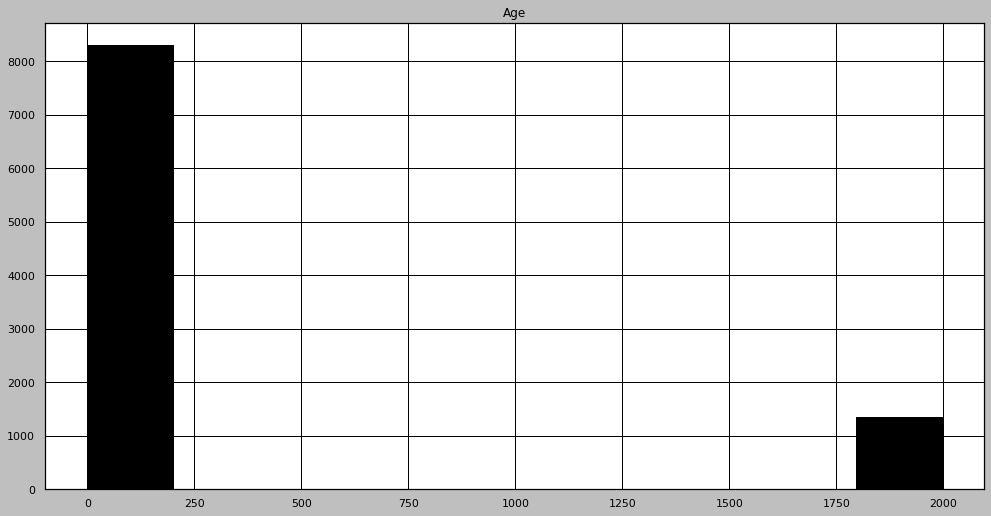

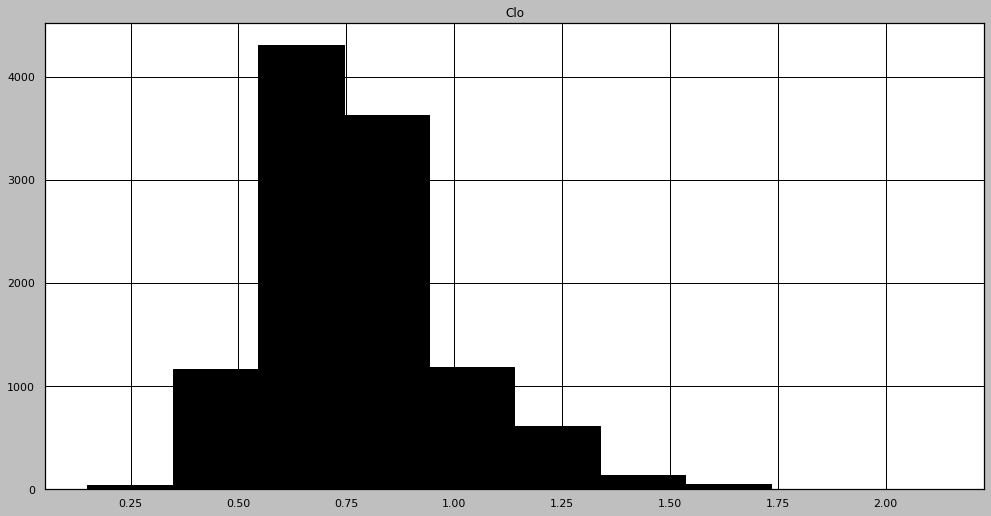

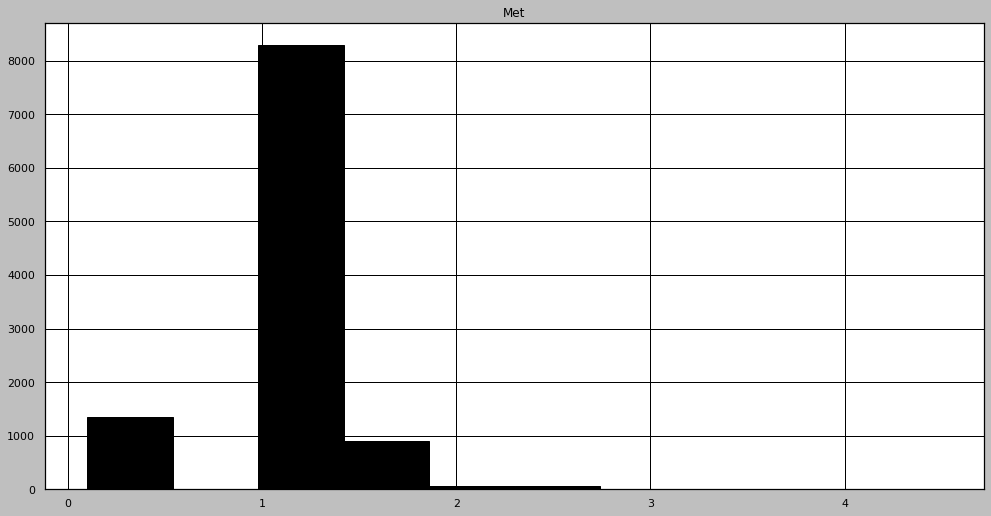

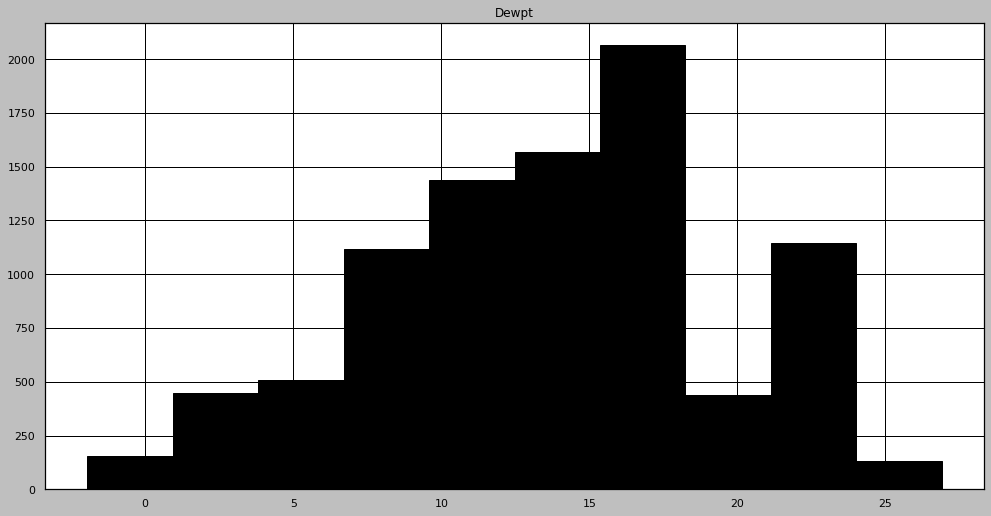

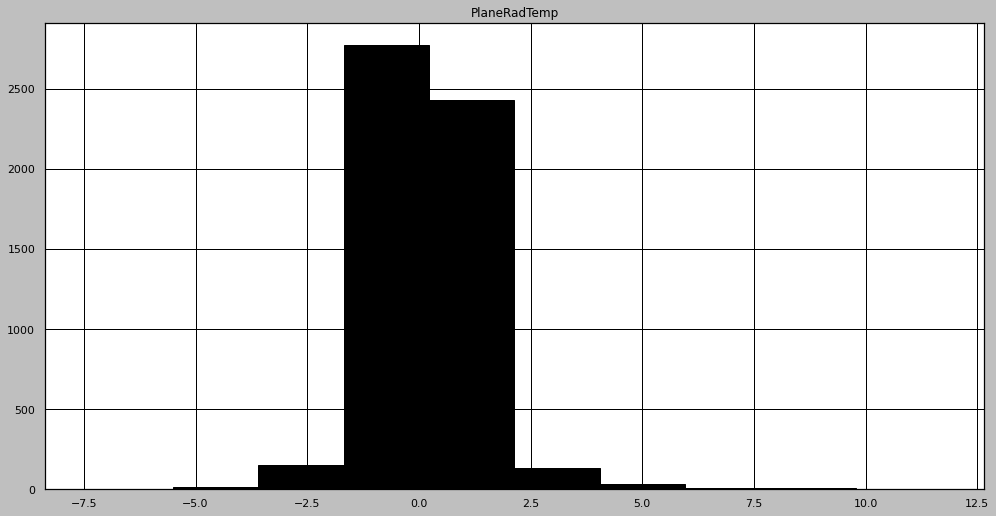

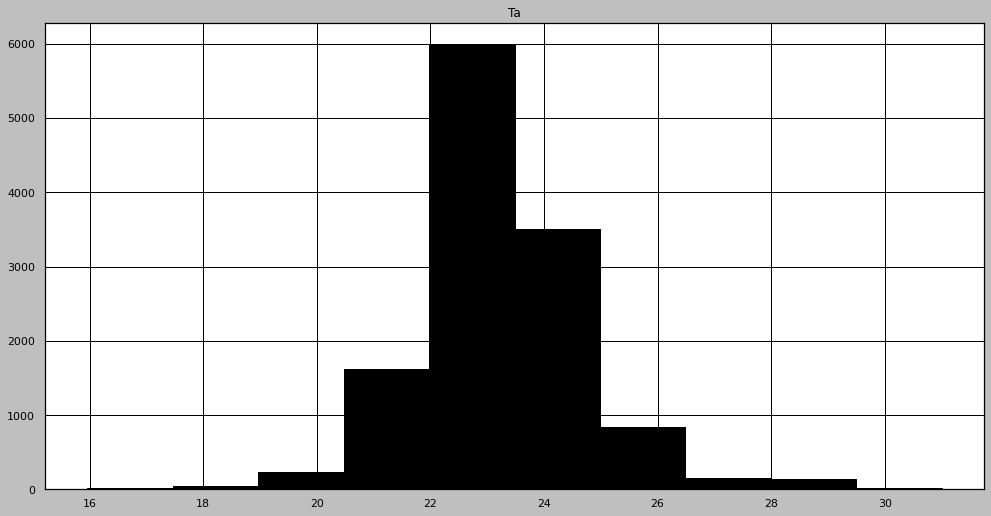

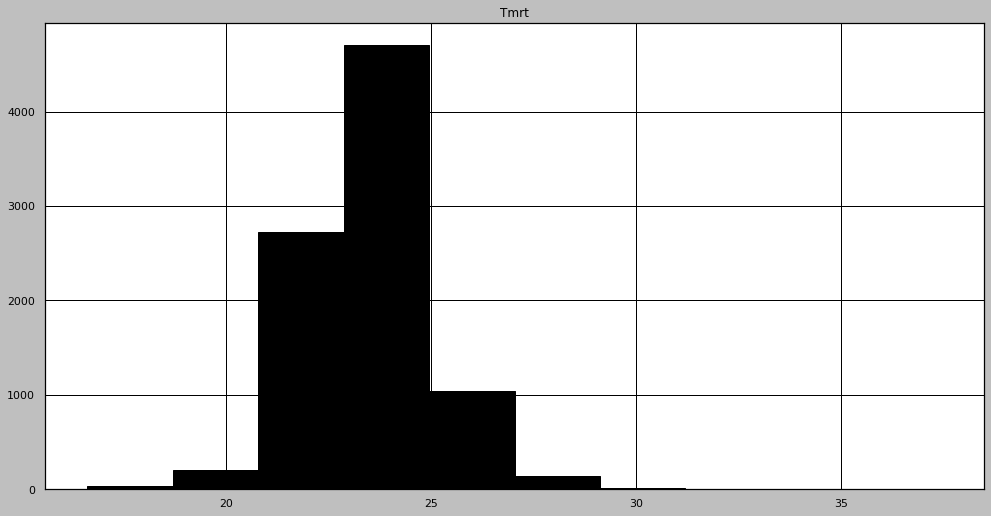

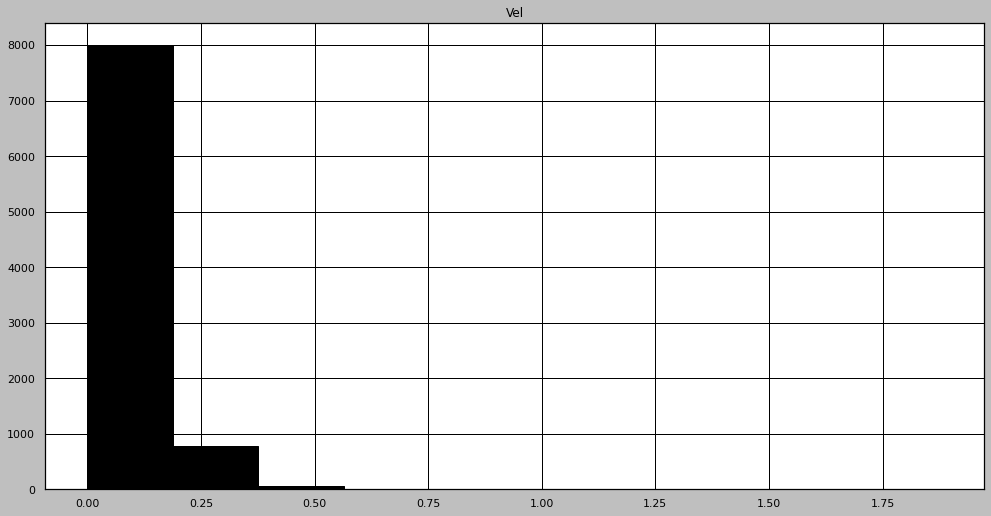

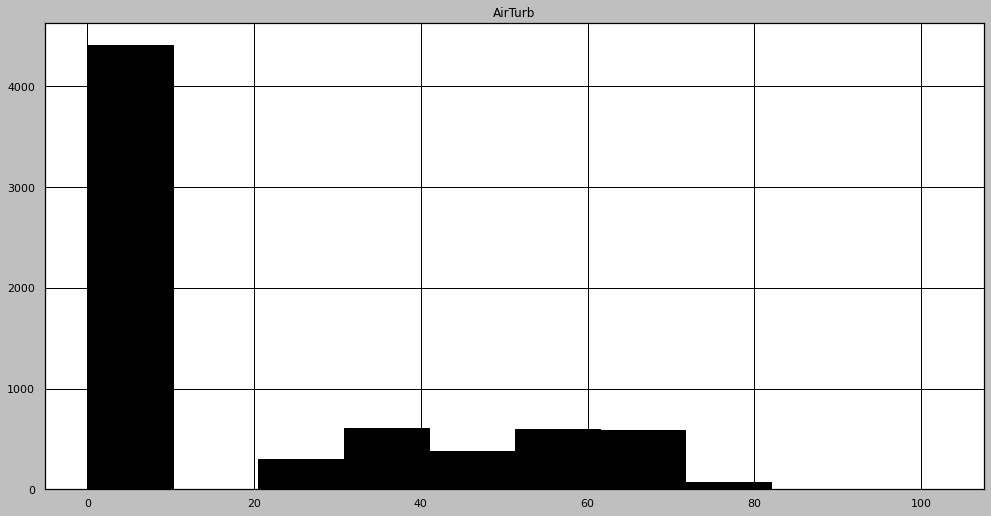

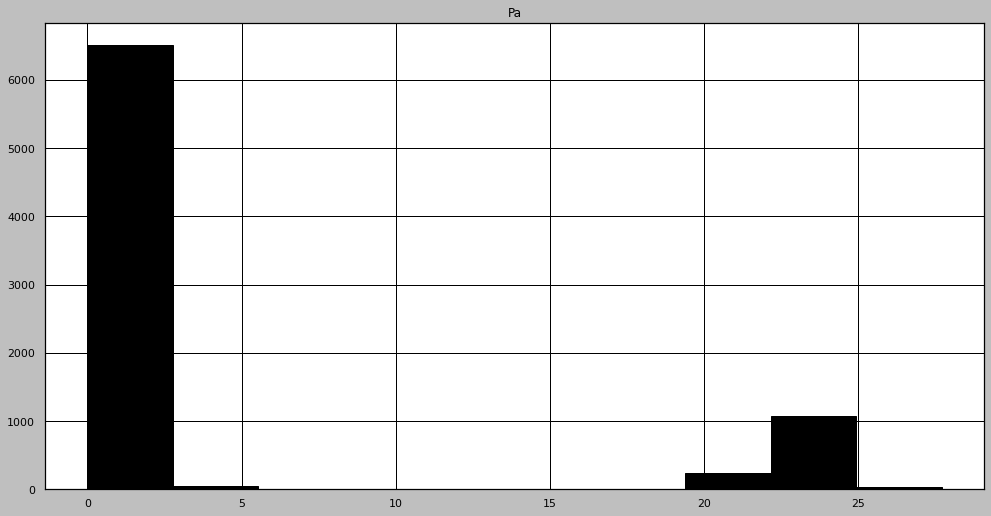

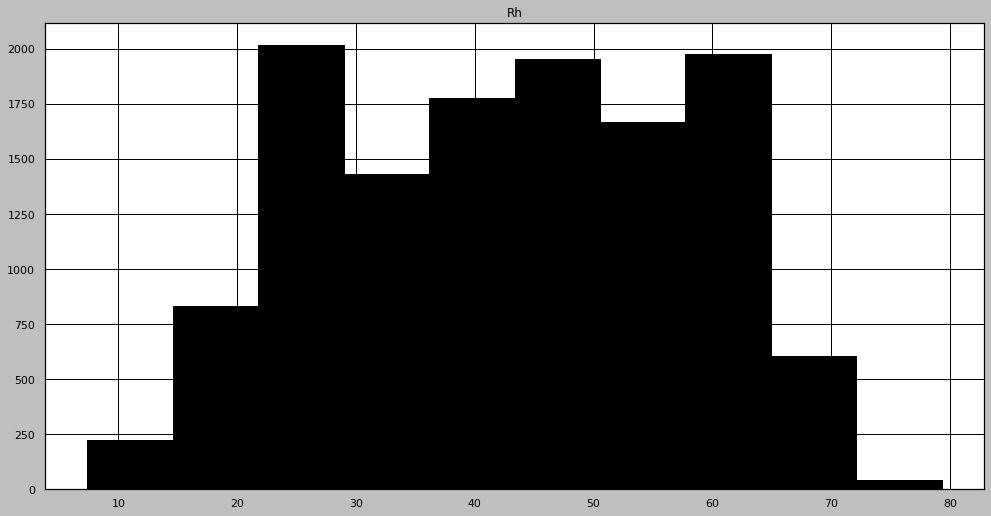

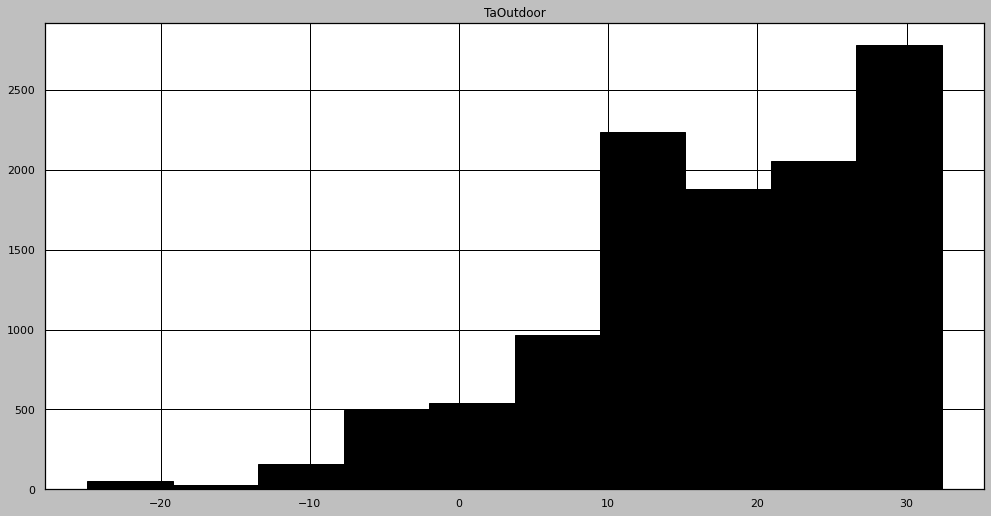

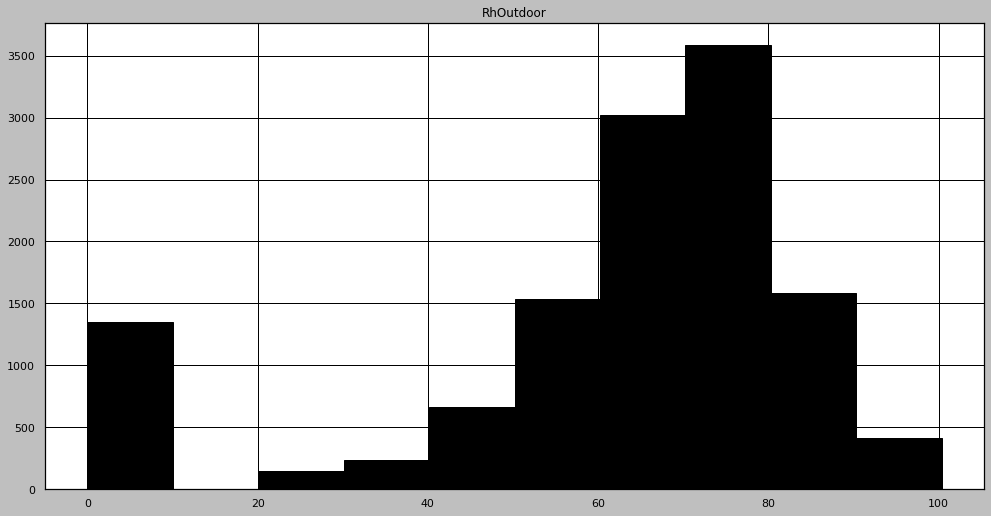

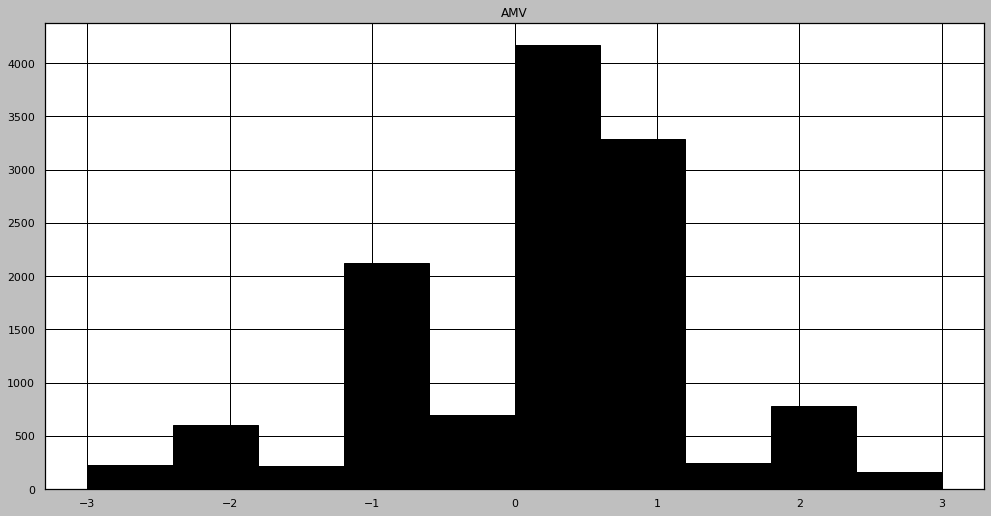

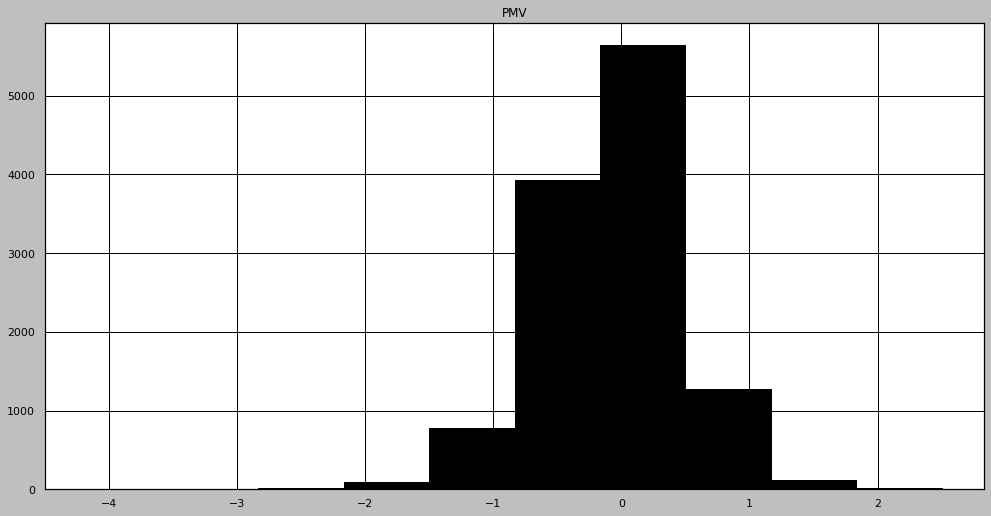

In [89]:
# question 2 : build histographs & boxplots, which ultimately result in the noise/anomaly patterns in the data
plt.style.use('grayscale')
plt.title("Age")
plt.hist(x1, bins = 10)
plt.show()
plt.title("Clo")
plt.hist(x2, bins = 10)
plt.show()
plt.title("Met")
plt.hist(x3, bins = 10)
plt.show()
plt.title("Dewpt")
plt.hist(x4, bins = 10)
plt.show()
plt.title("PlaneRadTemp")
plt.hist(x5, bins = 10)
plt.show()
plt.title("Ta")
plt.hist(x6, bins = 10)
plt.show()
plt.title("Tmrt")
plt.hist(x7, bins = 10)
plt.show()
plt.title("Vel")
plt.hist(x8, bins = 10)
plt.show()
plt.title("AirTurb")
plt.hist(x9, bins = 10)
plt.show()
plt.title("Pa")
plt.hist(x10, bins = 10)
plt.show()
plt.title("Rh")
plt.hist(x11, bins = 10)
plt.show()
plt.title("TaOutdoor")
plt.hist(x12, bins = 10)
plt.show()
plt.title("RhOutdoor")
plt.hist(x13, bins = 10)
plt.show()
plt.title("AMV")
plt.hist(y1, bins = 10)
plt.show()
plt.title("PMV")
plt.hist(y2, bins = 10)
plt.show()

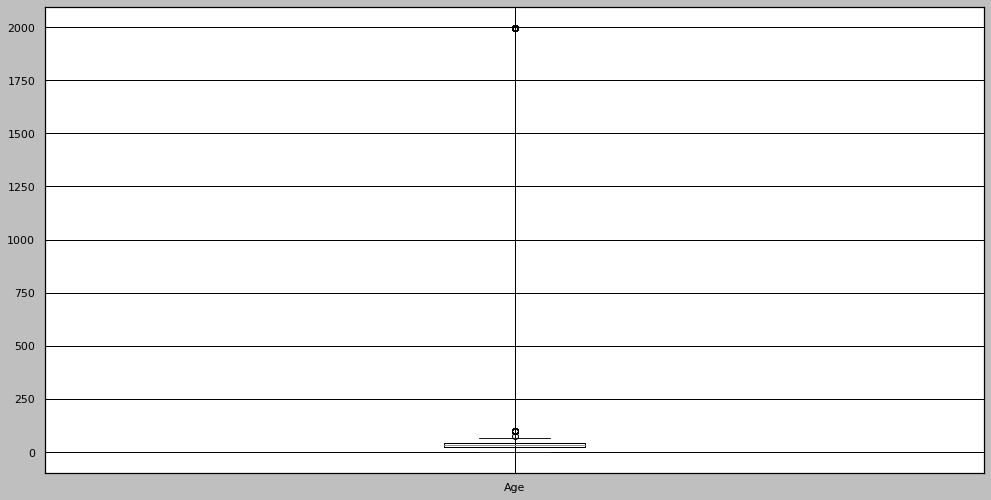

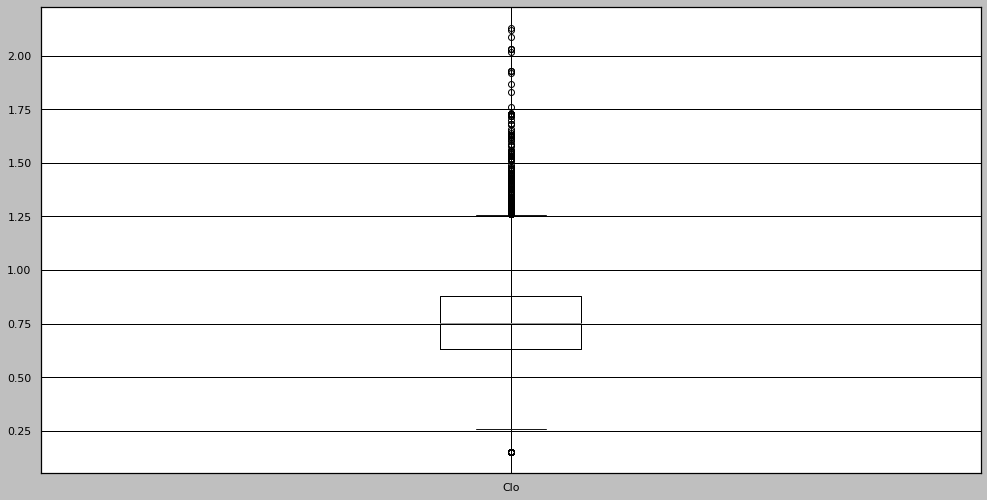

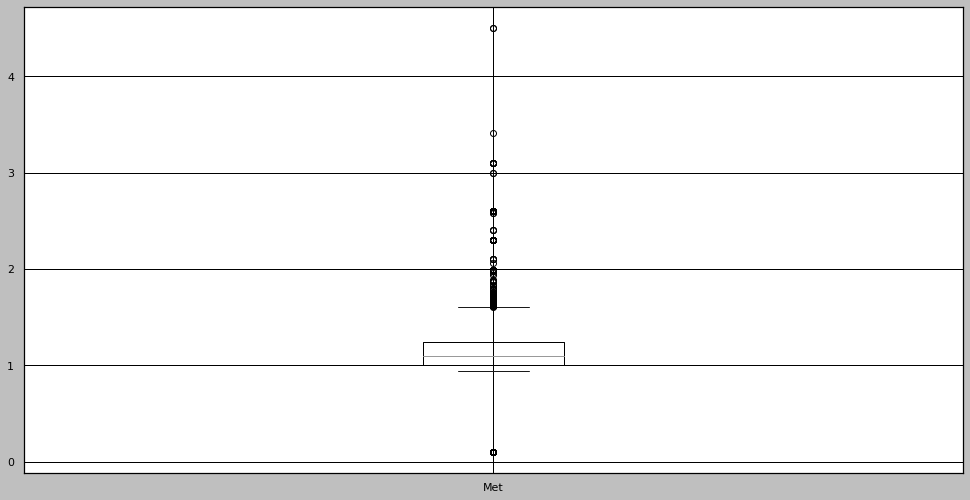

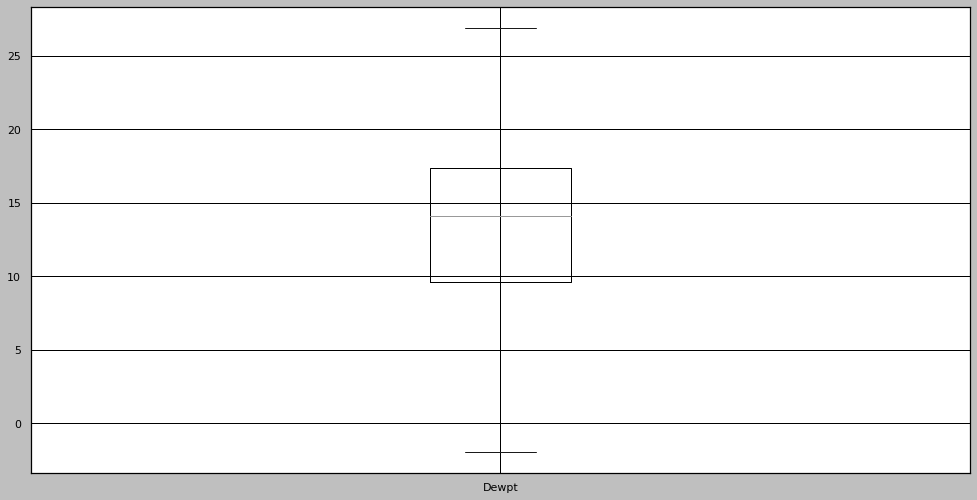

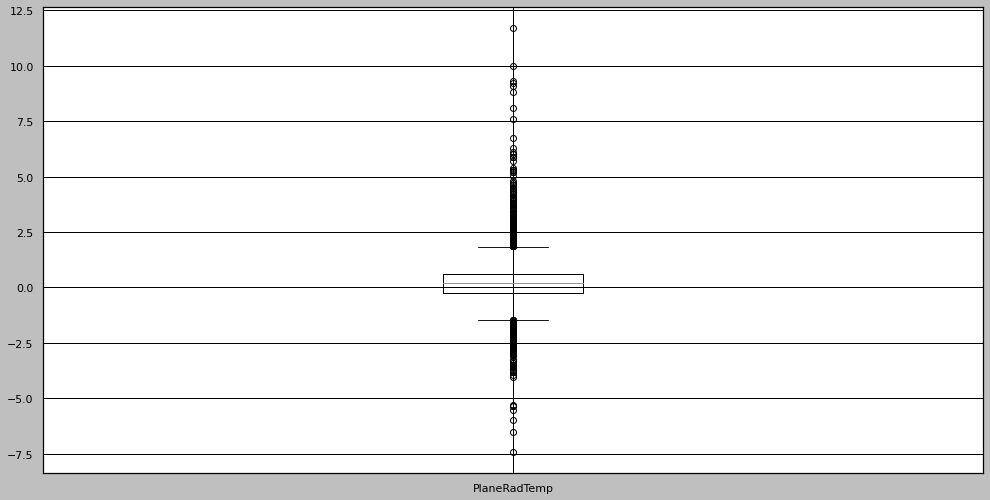

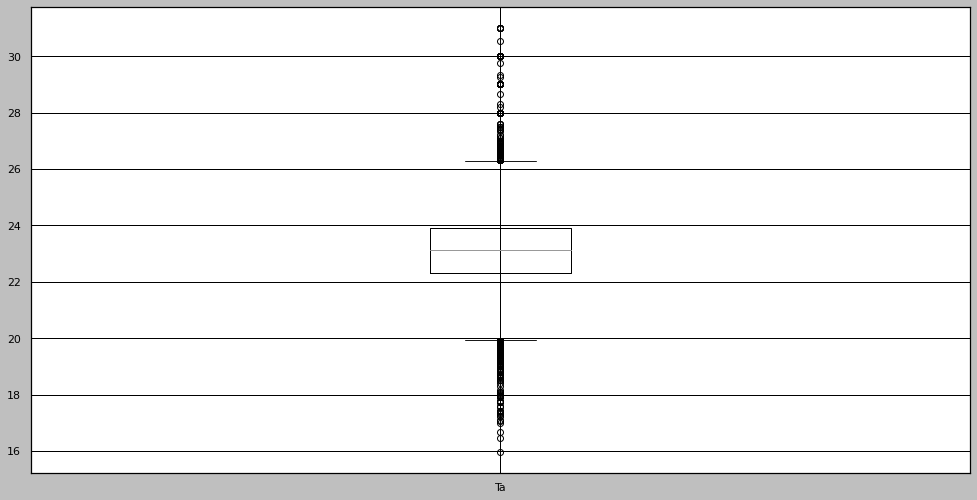

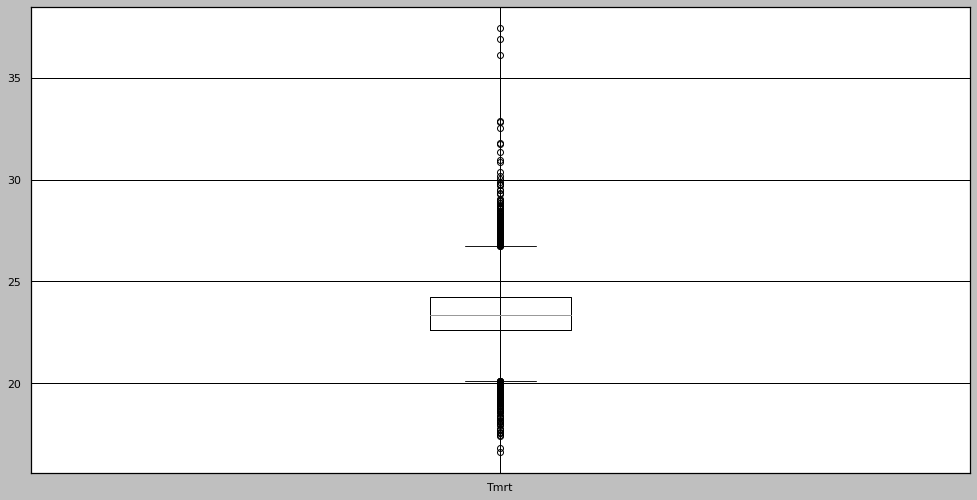

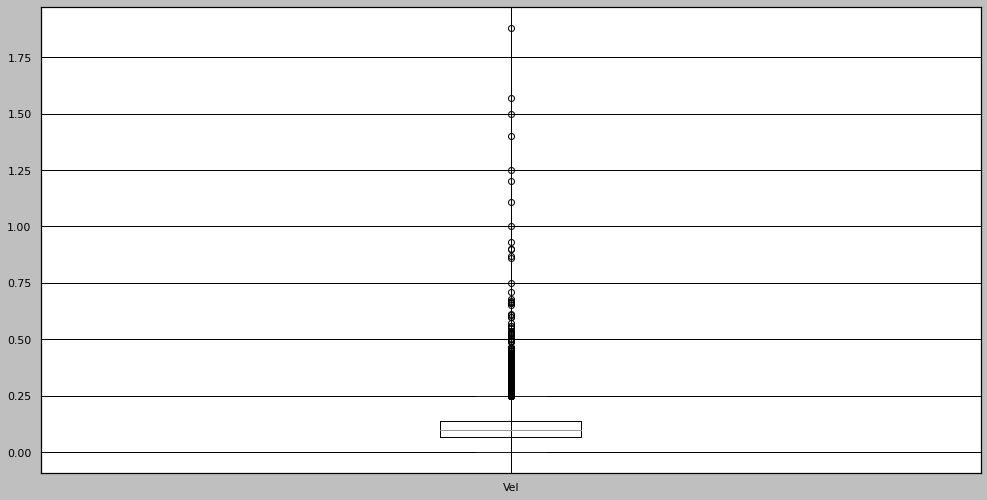

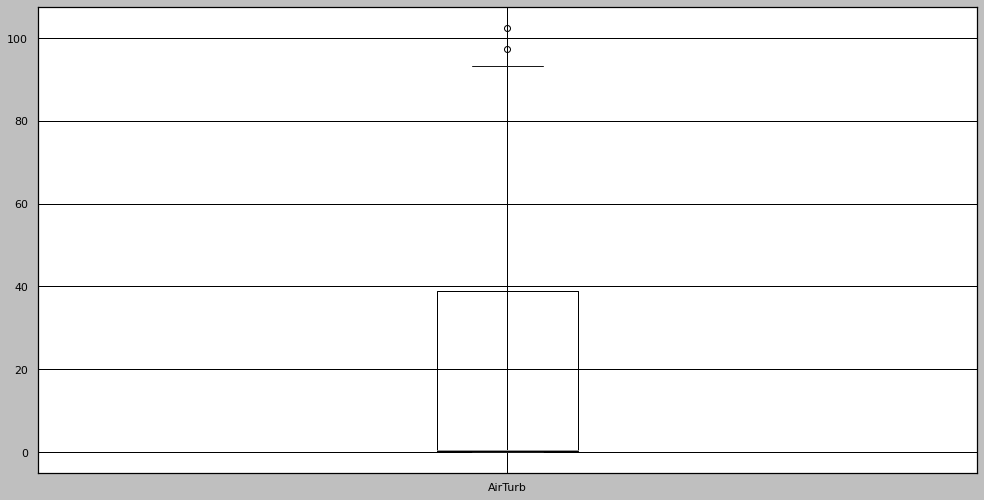

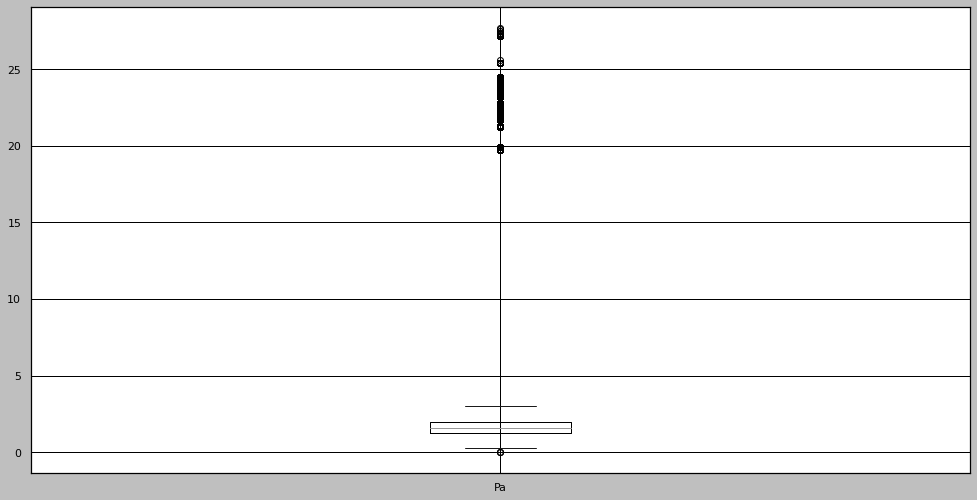

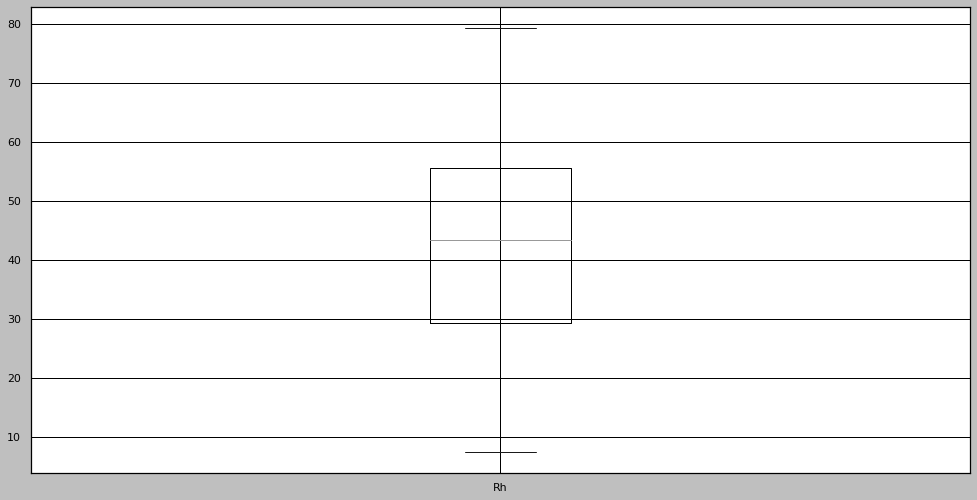

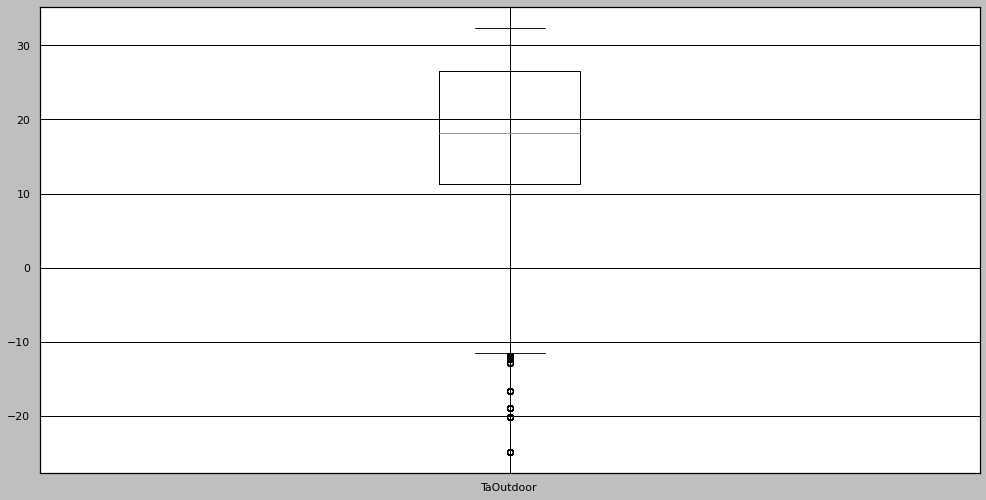

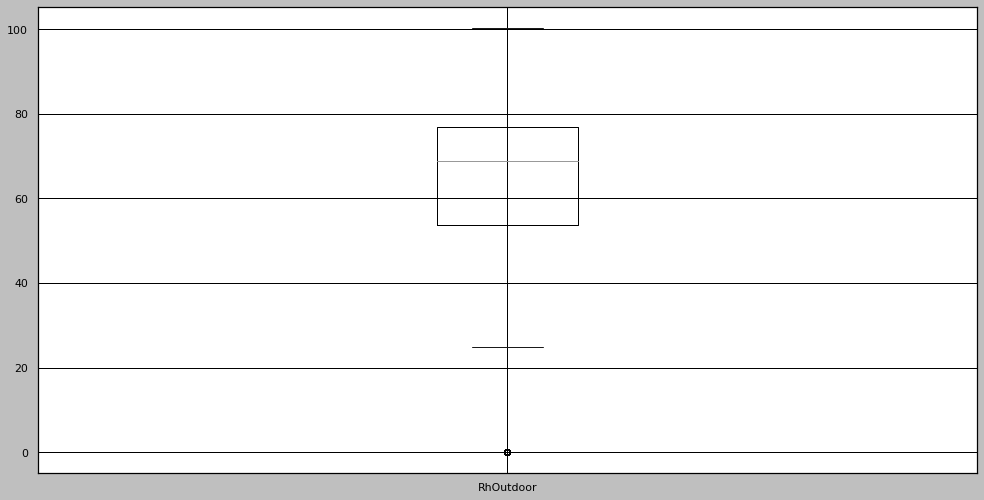

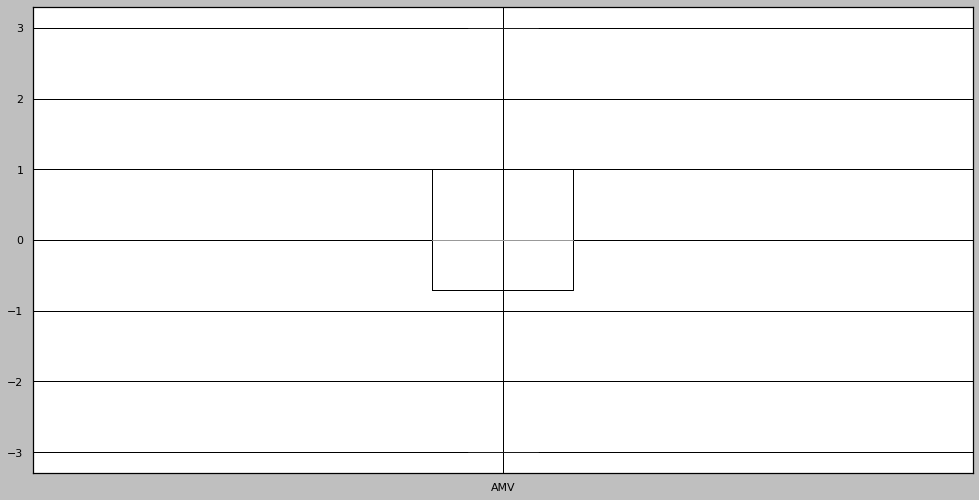

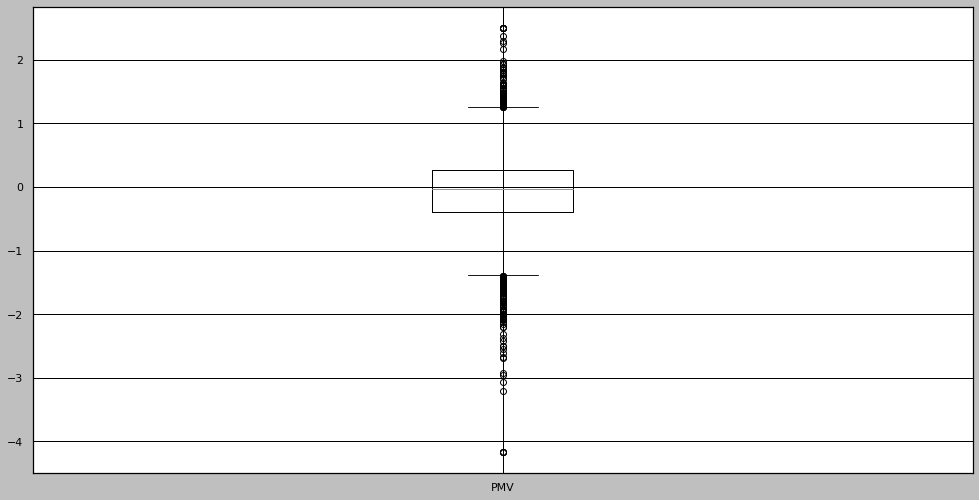

In [90]:
plt.style.use('grayscale')
stud_bplt = df.boxplot(column = 'Age')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'Clo')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'Met')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'Dewpt')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'PlaneRadTemp')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'Ta')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'Tmrt')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'Vel')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'AirTurb')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'Pa')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'Rh')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'TaOutdoor')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'RhOutdoor')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'AMV')
stud_bplt.plot()
plt.show()
stud_bplt = df.boxplot(column = 'PMV')
stud_bplt.plot()
plt.show()



---



In [91]:
# question 3 : missing values
xx1 = x1.fillna(x1.mode())
xx2 = x2.fillna(x2.mode())
xx3 = x3.fillna(x3.mode())
xx4 = x4.fillna(x4.mode())
xx5 = x5.fillna(x5.mode())
xx6 = x6.fillna(x6.mode())
xx7 = x7.fillna(x7.mode())
xx8 = x8.fillna(x8.mode())
xx9 = x9.fillna(x9.mode())
xx10 = x10.fillna(x10.mode())
xx11 = x11.fillna(x11.mode())
xx12 = x12.fillna(x12.mode())
xx13 = x13.fillna(x13.mode())
xy1 = y1.fillna(y1.mode())
xy2 = y2.fillna(y2.mode())

# rebuild

dff = pd.DataFrame()
dff['Age']  = xx1
dff['Clo'] = xx2
dff['Met'] = xx3
dff['Dewpt'] = xx4
dff['PlaneRadTemp'] = xx5
dff['Ta'] = xx6
dff['Tmrt'] = xx7
dff['Vel'] = xx8
dff['AirTurb'] = xx9
dff['Pa'] = xx10
dff['Rh'] = xx11
dff['TaOutdoor'] = xx12
dff['RhOutdoor'] = xx13
dff['AMV'] = xy1
dff['PMV'] = xy2
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           9651 non-null   float64
 1   Clo           11159 non-null  float64
 2   Met           10678 non-null  float64
 3   Dewpt         9015 non-null   float64
 4   PlaneRadTemp  5545 non-null   float64
 5   Ta            12545 non-null  float64
 6   Tmrt          8864 non-null   float64
 7   Vel           8865 non-null   float64
 8   AirTurb       6966 non-null   float64
 9   Pa            7911 non-null   float64
 10  Rh            12530 non-null  float64
 11  TaOutdoor     11197 non-null  float64
 12  RhOutdoor     12546 non-null  float64
 13  AMV           12510 non-null  float64
 14  PMV           11869 non-null  float64
dtypes: float64(15)
memory usage: 1.4 MB




---



In [92]:
# question 4 : handling outliers
    # for age, if value is greater than 90 (i don't think people should live above 90)
for x in x1:
  if x>90:
    np.append(x1, x1.mean())

In [93]:
df.info() # fails to drop null :(

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           9650 non-null   float64
 1   Clo           11159 non-null  float64
 2   Met           10678 non-null  float64
 3   Dewpt         9014 non-null   float64
 4   PlaneRadTemp  5544 non-null   float64
 5   Ta            12545 non-null  float64
 6   Tmrt          8864 non-null   float64
 7   Vel           8865 non-null   float64
 8   AirTurb       6965 non-null   float64
 9   Pa            7910 non-null   float64
 10  Rh            12530 non-null  float64
 11  TaOutdoor     11197 non-null  float64
 12  RhOutdoor     12546 non-null  float64
 13  AMV           12510 non-null  float64
 14  PMV           11869 non-null  float64
dtypes: float64(15)
memory usage: 1.4 MB




---



In [94]:
# question five : variance done in report

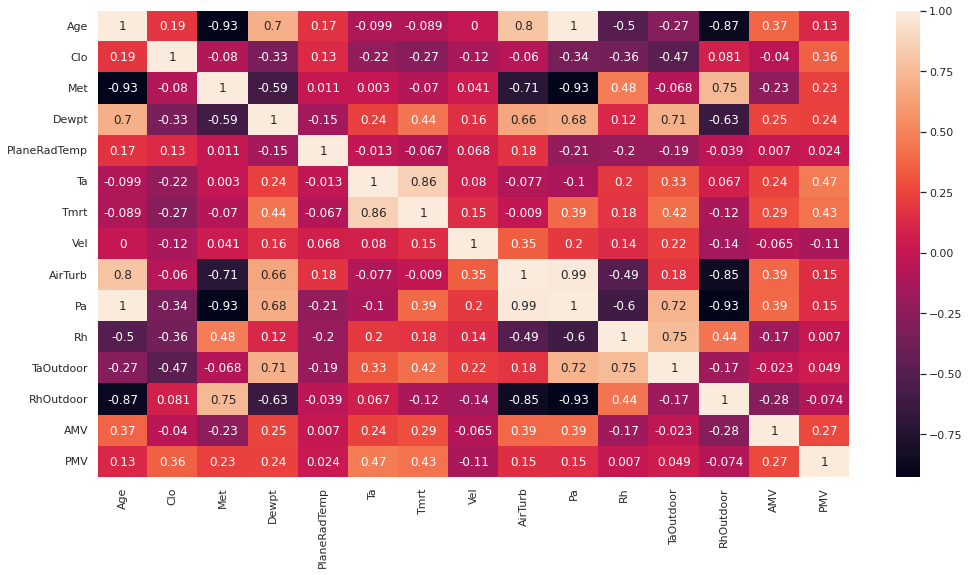

In [95]:
arr = df.corr().round(3)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(arr, annot=True)
plt.show()



---



In [96]:
# question 7 : entropy & information gain
def entropy(df):
    p = df.value_counts(normalize = True)
    entropy = -1 * np.sum(np.log2(p) * p)
    return round(entropy, 3)

In [104]:
# calculate entropy
print(entropy(dff['Age']))
print(entropy(dff['Clo']))
print(entropy(dff['Met']))
print(entropy(dff['Dewpt']))
print(entropy(dff['PlaneRadTemp']))
print(entropy(dff['Ta']))
print(entropy(dff['Tmrt']))
print(entropy(dff['Vel']))
print(entropy(dff['AirTurb']))
print(entropy(dff['Pa']))
print(entropy(dff['Rh']))
print(entropy(dff['TaOutdoor']))
print(entropy(dff['RhOutdoor']))
print(entropy(dff['AMV']))
print(entropy(dff['PMV']))

4.837
7.791
5.397
9.751
9.152
8.27
10.386
6.537
9.682
10.163
10.871
8.009
7.199
3.481
7.683


In [105]:
def calculate_IG(df, t, f):
    te = entropy(df[t])
    entropy_list = []
    weight_list = []
    for i in df[f].unique():
        fl = df[df[f] == i]
        entropy_level = entropy(fl[t])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(fl) / len(df)
        weight_list.append(round(weight_level, 3))
    re = np.sum(np.array(entropy_list) * np.array(weight_list))
    information_gain = te - re
    return information_gain

for i in dff.drop(columns = 'AMV').columns:
    info_gain = calculate_IG(df, 'AMV', i)
    print(i)
    print(round(info_gain, 3))    

Age
1.226
Clo
0.976
Met
1.106
Dewpt
2.339
PlaneRadTemp
2.683
Ta
1.319
Tmrt
2.364
Vel
1.416
AirTurb
2.919
Pa
3.02
Rh
2.378
TaOutdoor
1.002
RhOutdoor
0.851
PMV
0.769




---



# **Part B. Applying Algorithms**

In [106]:
# question 1 : Normalisation
from sklearn.preprocessing import MinMaxScaler
X = dff[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']]
y = dff.drop(X, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
object = MinMaxScaler()
object.fit_transform(X_train)
object.fit_transform(X_test)

array([[0.01202405, 0.2458427 , 0.35346985, ..., 0.64889659, 0.5       ,
        0.56997972],
       [0.02254509, 0.56179775,        nan, ..., 0.70453413, 0.5       ,
        0.68965517],
       [0.02955912, 0.88764045, 0.36666667, ..., 0.61783757, 0.5       ,
        0.79310345],
       ...,
       [0.02254509, 0.4494382 ,        nan, ..., 0.56851021, 0.5       ,
        0.59837728],
       [0.02755511, 0.59550562,        nan, ..., 0.7513702 , 0.66666667,
        0.64300203],
       [0.01553106, 0.23969663, 0.35062571, ..., 0.53833764, 0.66666667,
        0.58823529]])

In [114]:
# question 3 : 
dfr = dff.dropna()
    # first attempt forward
X = dfr.iloc[:, [0,1]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size = 0.80, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
    # second attempt forward
X = dfr.iloc[:, [0,1,2,3]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size = 0.80, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
    # third attempt forward
X = dfr.iloc[:, [0,1,2,3,4,5]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size = 0.80, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
    # fourth attempt forward
X = dfr.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size = 0.80, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
    # fifth attempt forward
X = dfr.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size = 0.80, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
    # sixth attempt forward
X = dfr.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size = 0.80, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
    # seventh attempt forward
X = dfr.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size = 0.80, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
# end

Accuracy:  38.01452784503632 %
Accuracy:  37.04600484261501 %
Accuracy:  42.13075060532688 %
Accuracy:  42.3728813559322 %
Accuracy:  43.09927360774818 %
Accuracy:  43.341404358353515 %
Accuracy:  42.857142857142854 %


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [121]:
    # first attempt backwards
X = dfr.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, train_size = 0.20, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
    # second attempt backwards
X = dfr.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, train_size = 0.20, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
    # third attempt backwards
X = dfr.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, train_size = 0.20, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
    # fourth attempt backwards
X = dfr.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, train_size = 0.20, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
    # fifth attempt backwards
X = dfr.iloc[:, [0,1,2,3,4,5]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, train_size = 0.20, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
    # sixth attempt backwards
X = dfr.iloc[:, [0,1,2,3]].values
Y = dfr.iloc[:, 13].values
y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, train_size = 0.20, shuffle = True, random_state = 16)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logisticRegr = LogisticRegression(random_state=16)
logisticRegr.fit(X_train, y_train)
y_cap = logisticRegr.predict(X_test)
accuracy = accuracy_score(y_test, y_cap)
print("Accuracy: ",(accuracy*100),"%")
# end because huge drop in accuracy

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy:  38.07506053268765 %
Accuracy:  38.37772397094431 %
Accuracy:  38.68038740920097 %
Accuracy:  38.559322033898304 %
Accuracy:  39.16464891041162 %
Accuracy:  36.68280871670702 %
